In [107]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [108]:
df = pd.read_csv("data/data20_q1/data.csv")
df.head()

,Country,Date,Confirmed,Recovered,Deaths
0,Germany,2020-01-22,0,0,0
1,Germany,2020-01-23,0,0,0
2,Germany,2020-01-24,0,0,0
3,Germany,2020-01-25,0,0,0
4,Germany,2020-01-26,0,0,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    6800 non-null   object
 1   Date       6800 non-null   object
 2   Confirmed  6800 non-null   int64 
 3   Recovered  6800 non-null   int64 
 4   Deaths     6800 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 265.8+ KB


In [110]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    6800 non-null   object        
 1   Date       6800 non-null   datetime64[ns]
 2   Confirmed  6800 non-null   int64         
 3   Recovered  6800 non-null   int64         
 4   Deaths     6800 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 265.8+ KB


In [111]:
df["Active"] = df["Confirmed"] - df["Recovered"] - df["Deaths"]
df.head()

,Country,Date,Confirmed,Recovered,Deaths,Active
0,Germany,2020-01-22,0,0,0,0
1,Germany,2020-01-23,0,0,0,0
2,Germany,2020-01-24,0,0,0,0
3,Germany,2020-01-25,0,0,0,0
4,Germany,2020-01-26,0,0,0,0


In [112]:
df.describe()

,Confirmed,Recovered,Deaths,Active
count,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03
mean,9.773762e+06,1.325311e+06,1.469637e+05,8.301487e+06
std,1.488955e+07,3.718714e+06,1.986277e+05,1.489044e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.700805e+05,0.000000e+00,2.843975e+04,9.954725e+04
50%,4.261185e+06,7.056850e+04,8.703750e+04,9.976785e+05
75%,1.082262e+07,5.615018e+05,1.392890e+05,8.578785e+06
max,8.323759e+07,3.097475e+07,1.002020e+06,8.223557e+07


In [113]:
df.corr()

,Confirmed,Recovered,Deaths,Active
Confirmed,1.000000,0.074962,0.953456,0.968501
Recovered,0.074962,1.000000,0.067141,-0.175676
Deaths,0.953456,0.067141,1.000000,0.923292
Active,0.968501,-0.175676,0.923292,1.000000


In [114]:
period = (df['Date'] <= "2020-05-20")
df_period = df.loc[period]

In [115]:
data_by_date = df_period.groupby("Date")[["Confirmed", "Recovered", "Deaths", "Active"]].sum()
data_by_date

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-01-22,1,0,0,1
2020-01-23,1,0,0,1
2020-01-24,4,0,0,4
2020-01-25,5,0,0,5
2020-01-26,8,0,0,8
...,...,...,...,...
2020-05-16,2788725,954901,196352,1637472
2020-05-17,2824949,971935,198135,1654879
2020-05-18,2864072,997356,200003,1666713


## Trend of Recovered, Confirmed, Death, and Active COVID-19 Cases

In [116]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_by_date.index, y=data_by_date["Recovered"],
                         mode='lines+markers',
                         name='Recovered Cases'))
fig.add_trace(go.Scatter(x=data_by_date.index, y=data_by_date["Confirmed"],
                         mode='lines+markers',
                         name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data_by_date.index, y=data_by_date["Deaths"],
                         mode='lines+markers',
                         name='Death Cases'))
fig.add_trace(go.Scatter(x=data_by_date.index, y=data_by_date["Active"],
                         mode='lines+markers',
                         name='Active Cases'))
fig.update_layout(title="Trend of different types of cases",
                  xaxis_title="Date", yaxis_title="Number of Cases", legend=dict(x=0, y=1, traceorder="normal"))
fig.show()

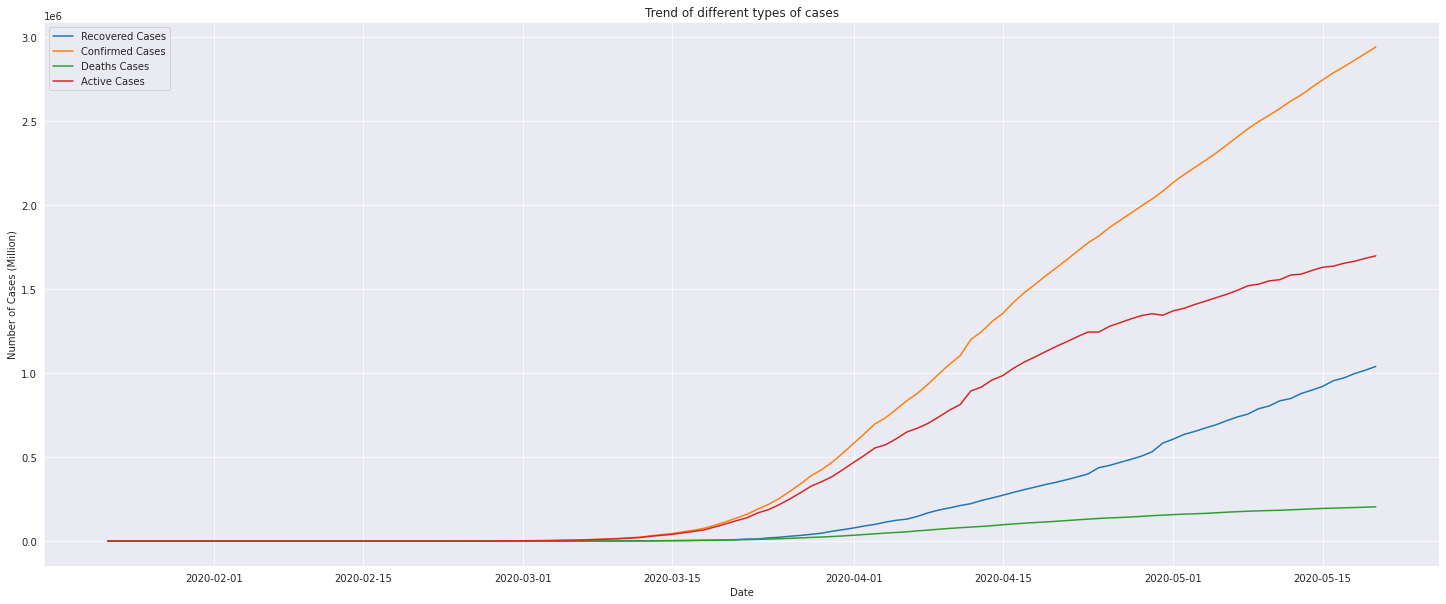

In [117]:
plt.figure(figsize=(25, 10))
plt.plot(data_by_date["Recovered"], label="Recovered Cases")
plt.plot(data_by_date["Confirmed"], label="Confirmed Cases")
plt.plot(data_by_date["Deaths"], label="Deaths Cases")
plt.plot(data_by_date["Active"], label="Active Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases (Million)")
plt.title("Trend of different types of cases")
plt.legend()

## Trend of Recovered, Confirmed, Death, and Active COVID-19 Cases by Countries

In [118]:
def get_df_by_country(country):
    country_data = df_period.loc[df_period["Country"] == country]
    return country_data.groupby(["Date"])[["Confirmed", "Recovered", "Deaths", "Active"]].sum()

In [119]:
data_de_period = get_df_by_country("Germany")
data_es_period = get_df_by_country("Spain")
data_fr_period = get_df_by_country("France")
data_in_period = get_df_by_country("India")
data_it_period = get_df_by_country("Italy")
data_ru_period = get_df_by_country("Russia")
data_tr_period = get_df_by_country("Turkey")
data_us_period = get_df_by_country("United States")

In [120]:
def plot_by_case(case_type):
    plt.figure(figsize=(25, 10))
    plt.plot(data_de_period[case_type], label="Germany")
    plt.plot(data_es_period[case_type], label="Spain")
    plt.plot(data_fr_period[case_type], label="France")
    plt.plot(data_in_period[case_type], label="India")
    plt.plot(data_it_period[case_type], label="Italy")
    plt.plot(data_ru_period[case_type], label="Russia")
    plt.plot(data_tr_period[case_type], label="Turkey")
    plt.plot(data_us_period[case_type], label="United States")
    plt.xlabel("Date")
    plt.ylabel(f"Number of {case_type} Cases (Million)")
    plt.title(f"Trend of {case_type} Cases")
    plt.legend()

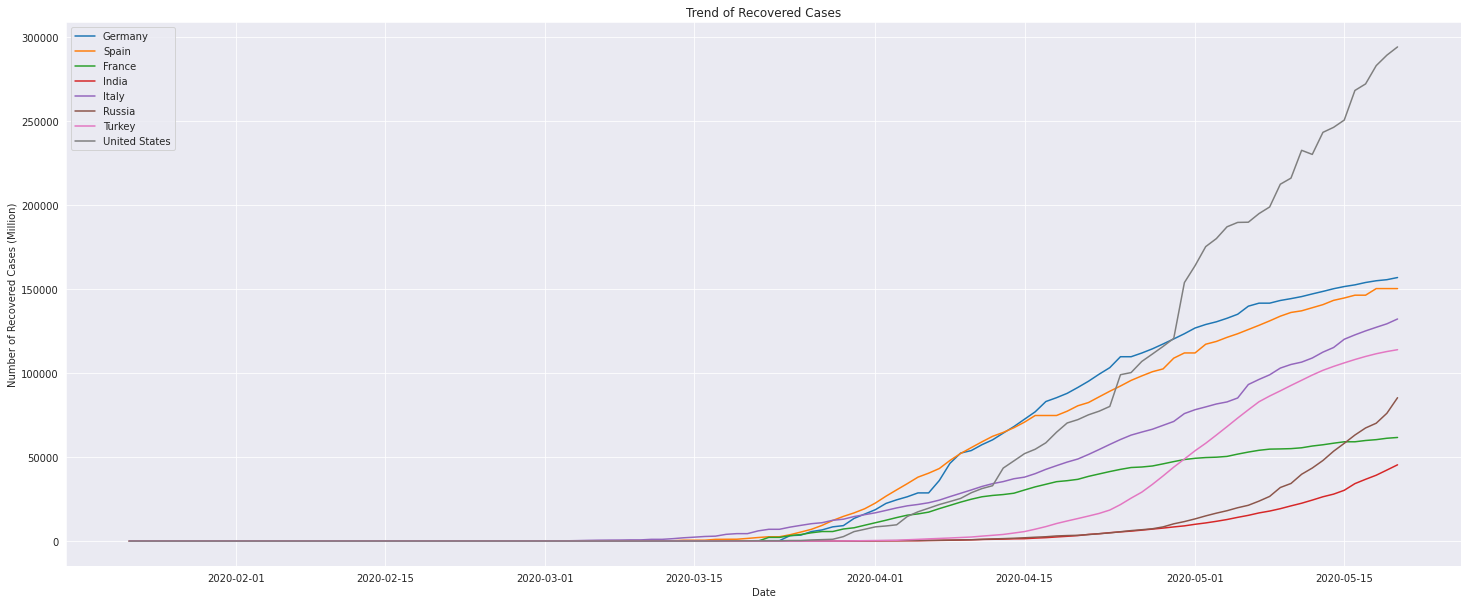

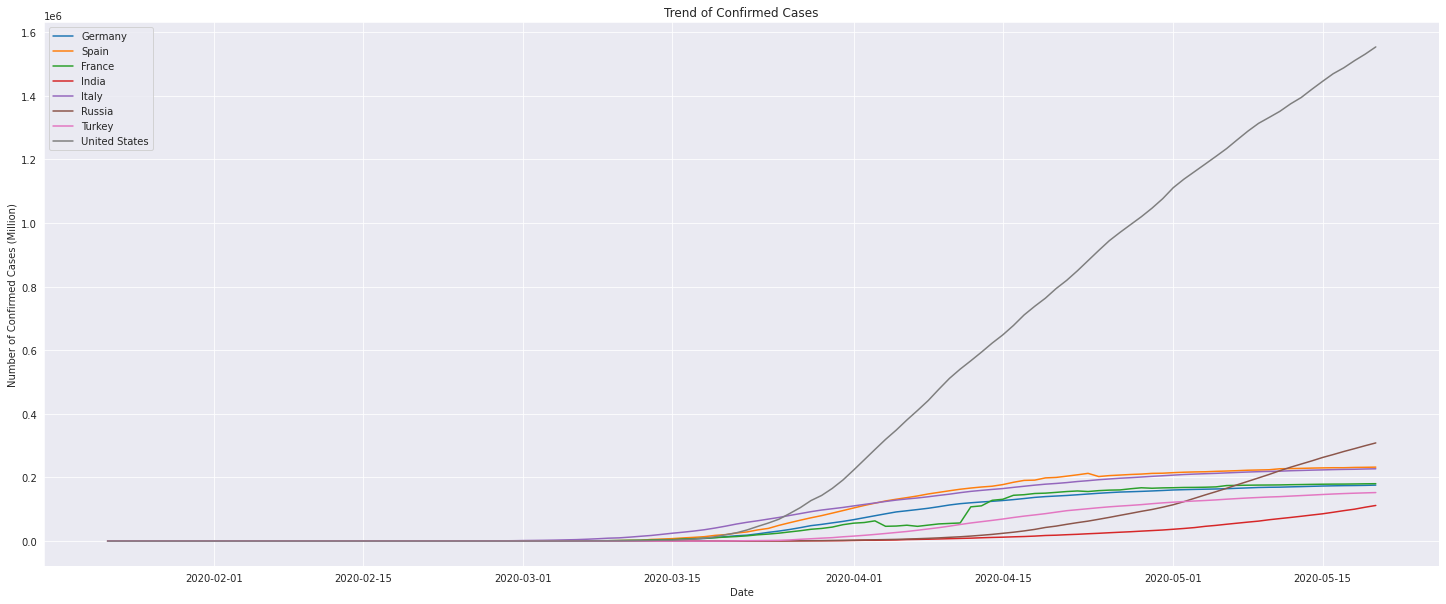

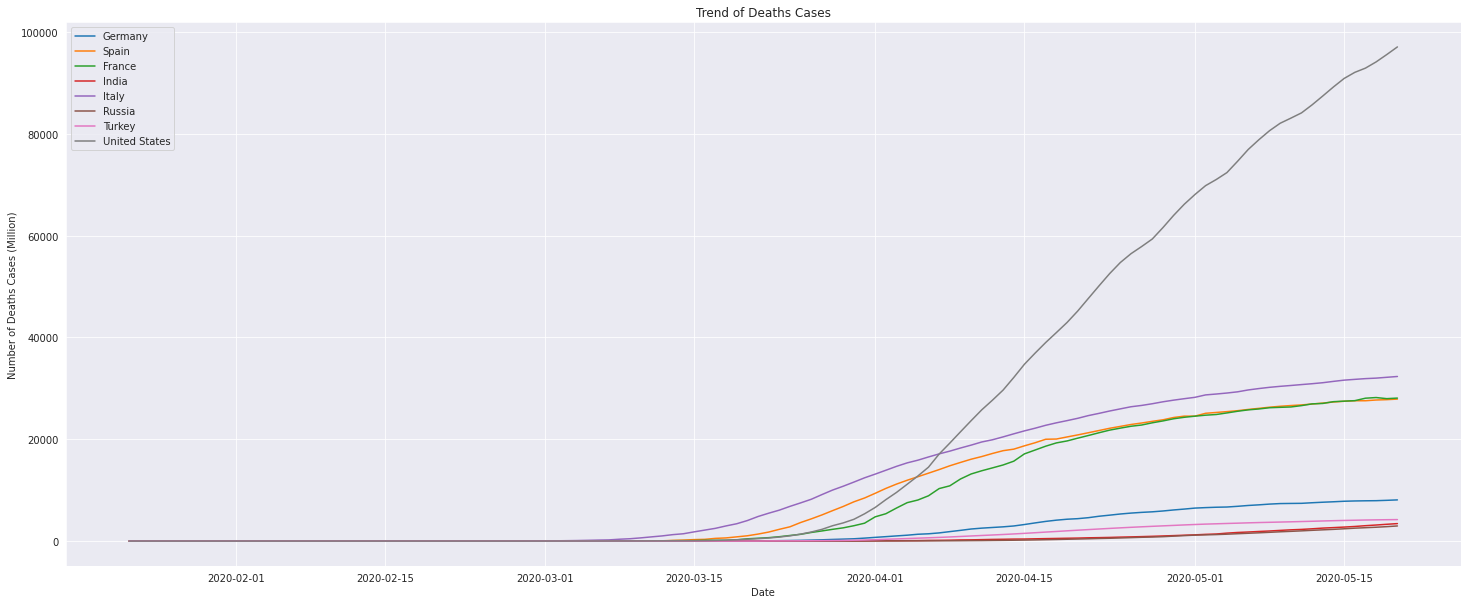

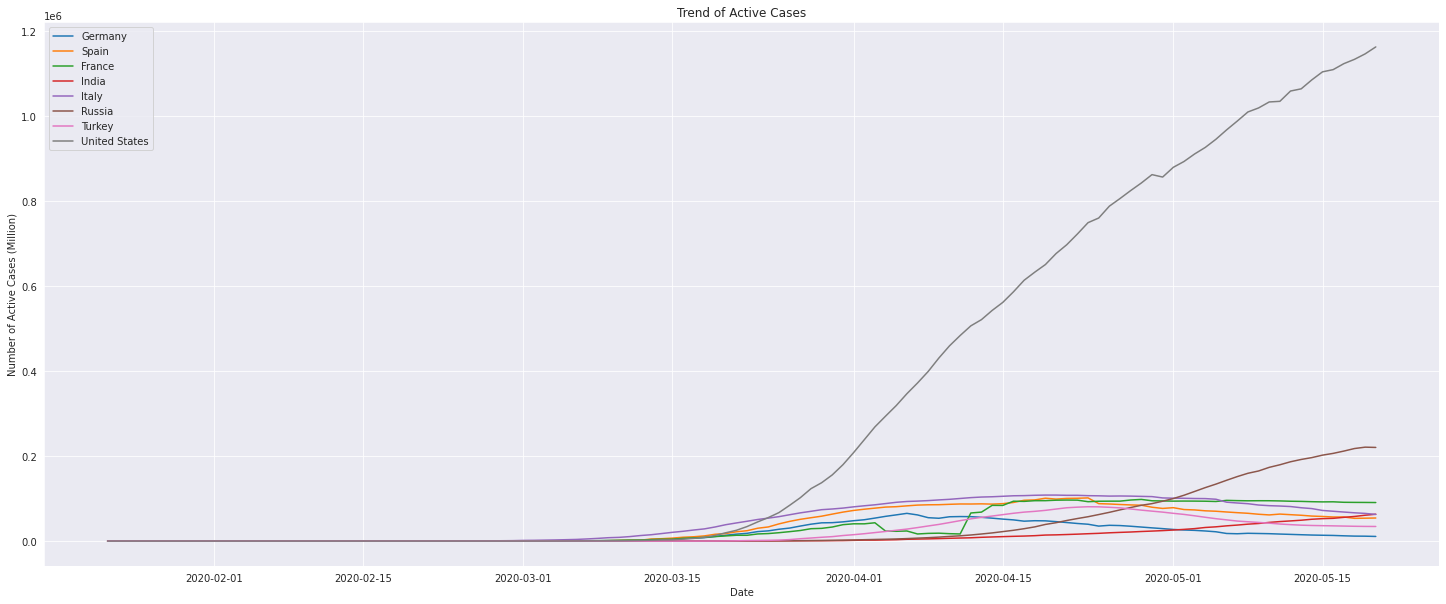

In [121]:
plot_by_case("Recovered")
plot_by_case("Confirmed")
plot_by_case("Deaths")
plot_by_case("Active")

## Mortality and Recovery rate of COVID-19 cases

Mortality Rate = (Number of Death Cases / Number of Confirmed Cases) x 100
Recovery Rate= (Number of Recovered Cases / Number of Confirmed Cases) x 100

In [122]:
data_by_date["Recovery Rate"] = (data_by_date["Recovered"] / data_by_date["Confirmed"]) * 100
data_by_date["Mortality Rate"] = (data_by_date["Deaths"] / data_by_date["Confirmed"]) * 100
data_by_date["Closed Cases"] = data_by_date["Recovered"] + data_by_date["Deaths"]

print("Average Recovery Rate", data_by_date["Recovery Rate"].mean())
print("Median Recovery Rate", data_by_date["Recovery Rate"].median())
print()
print("Average Mortality Rate", data_by_date["Mortality Rate"].mean())
print("Median Mortality Rate", data_by_date["Mortality Rate"].median())

Average Recovery Rate 15.991615964821746
Median Recovery Rate 14.021325875719302

Average Mortality Rate 4.4411743863277575
Median Mortality Rate 5.333785976766896


In [123]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Recovery Rate", "Mortality Rate"))

fig.add_trace(
    go.Scatter(x=data_by_date.index, y=data_by_date["Recovery Rate"], name="Recovery Rate"), row=1, col=1
)
fig.add_trace(
    go.Scatter(x=data_by_date.index, y=data_by_date["Mortality Rate"], name="Mortality Rate"), row=2, col=1
)

fig.update_layout(height=1000, legend=dict(x=-0.1, y=1.2, traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

## Recovery and Mortality Rate of Covid-19 Cases by Country

In [124]:
def get_recovery_rate(data):
    return (data["Recovered"] / data["Confirmed"]) * 100

def get_mortality_rate(data):
    return (data["Deaths"] / data["Confirmed"]) * 100

In [125]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=data_es_period.index, y=get_recovery_rate(data_de_period), name="Germany")
)
fig.add_trace(
    go.Scatter(x=data_es_period.index, y=get_recovery_rate(data_es_period), name="Spain")
)
fig.add_trace(
    go.Scatter(x=data_fr_period.index, y=get_recovery_rate(data_fr_period), name="France")
)
fig.add_trace(
    go.Scatter(x=data_in_period.index, y=get_recovery_rate(data_in_period), name="India")
)
fig.add_trace(
    go.Scatter(x=data_it_period.index, y=get_recovery_rate(data_it_period), name="Italy")
)
fig.add_trace(
    go.Scatter(x=data_ru_period.index, y=get_recovery_rate(data_ru_period), name="Russia")
)
fig.add_trace(
    go.Scatter(x=data_tr_period.index, y=get_recovery_rate(data_tr_period), name="Turkey")
)
fig.add_trace(
    go.Scatter(x=data_us_period.index, y=get_recovery_rate(data_us_period), name="United States")
)

fig.update_layout(height=1000, legend=dict(x=-0.1, y=1.2, traceorder="normal"))
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Recovery Rate")

fig.show()

In [126]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=data_es_period.index, y=get_mortality_rate(data_de_period), name="Germany")
)
fig.add_trace(
    go.Scatter(x=data_es_period.index, y=get_mortality_rate(data_es_period), name="Spain")
)
fig.add_trace(
    go.Scatter(x=data_fr_period.index, y=get_mortality_rate(data_fr_period), name="France")
)
fig.add_trace(
    go.Scatter(x=data_in_period.index, y=get_mortality_rate(data_in_period), name="India")
)
fig.add_trace(
    go.Scatter(x=data_it_period.index, y=get_mortality_rate(data_it_period), name="Italy")
)
fig.add_trace(
    go.Scatter(x=data_ru_period.index, y=get_mortality_rate(data_ru_period), name="Russia")
)
fig.add_trace(
    go.Scatter(x=data_tr_period.index, y=get_mortality_rate(data_tr_period), name="Turkey")
)
fig.add_trace(
    go.Scatter(x=data_us_period.index, y=get_mortality_rate(data_us_period), name="United States")
)

fig.update_layout(height=1000, legend=dict(x=-0.1, y=1.2, traceorder="normal"))
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Mortality Rate")
fig.show()